In [126]:
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
df=pd.read_csv('heart.csv')

In [128]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect




In [129]:
# column name improved just for understanding

In [130]:
df = df.rename(columns={
    "sex": "gender",
    "cp": "chest_pain_type",
    "trestbps": "resting_bp",
    "chol": "cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "rest_ecg",
    "thalach": "max_heart_rate",
    "exang": "exercise_angina",
    "oldpeak": "st_depression",
    "slope": "st_slope",
    "ca": "num_major_vessels",
    "thal": "thalassemia",
    "target": "heart_disease"
})


In [131]:
df


,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [132]:
df.shape

(1025, 14)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1025 non-null   int64  
 1   gender               1025 non-null   int64  
 2   chest_pain_type      1025 non-null   int64  
 3   resting_bp           1025 non-null   int64  
 4   cholesterol          1025 non-null   int64  
 5   fasting_blood_sugar  1025 non-null   int64  
 6   rest_ecg             1025 non-null   int64  
 7   max_heart_rate       1025 non-null   int64  
 8   exercise_angina      1025 non-null   int64  
 9   st_depression        1025 non-null   float64
 10  st_slope             1025 non-null   int64  
 11  num_major_vessels    1025 non-null   int64  
 12  thalassemia          1025 non-null   int64  
 13  heart_disease        1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [134]:
df.describe()

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [135]:
normal_ranges = {
    "resting_bp": "90–120 mmHg (systolic normal), >140 = hypertension",
    "cholesterol": "<200 mg/dL normal, 200–239 borderline, >=240 high",
    "fasting_blood_sugar": "<100 mg/dL normal (fasting); >120 mg/dL = diabetic",
    "rest_ecg": "Categorical (0 = normal, 1 = ST-T abnormality, 2 = LVH)",
    "max_heart_rate": "≈ 220 – age (bpm)",
    "exercise_angina": "0 = No (normal), 1 = Yes (abnormal)",
    "st_depression": "0 = normal; higher indicates ischemia",
    "st_slope": "Categorical (0 = upsloping normal, 1 = flat abnormal, 2 = downsloping abnormal)",
    "num_major_vessels": "0 = normal; 1–3 = abnormal",
    "thalassemia": "Categorical (1 = normal, 2 = fixed defect, 3 = reversible defect)",
    "heart_disease": "0 = no disease (normal), 1 = disease"
}
normal_ranges

{'resting_bp': '90–120 mmHg (systolic normal), >140 = hypertension',
 'cholesterol': '<200 mg/dL normal, 200–239 borderline, >=240 high',
 'fasting_blood_sugar': '<100 mg/dL normal (fasting); >120 mg/dL = diabetic',
 'rest_ecg': 'Categorical (0 = normal, 1 = ST-T abnormality, 2 = LVH)',
 'max_heart_rate': '≈ 220 – age (bpm)',
 'exercise_angina': '0 = No (normal), 1 = Yes (abnormal)',
 'st_depression': '0 = normal; higher indicates ischemia',
 'st_slope': 'Categorical (0 = upsloping normal, 1 = flat abnormal, 2 = downsloping abnormal)',
 'num_major_vessels': '0 = normal; 1–3 = abnormal',
 'thalassemia': 'Categorical (1 = normal, 2 = fixed defect, 3 = reversible defect)',
 'heart_disease': '0 = no disease (normal), 1 = disease'}

In [136]:
# Data Cleaning

In [137]:
df.isnull().sum()

age                    0
gender                 0
chest_pain_type        0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exercise_angina        0
st_depression          0
st_slope               0
num_major_vessels      0
thalassemia            0
heart_disease          0
dtype: int64

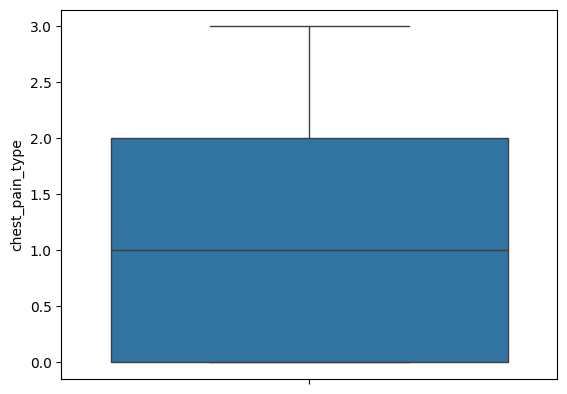

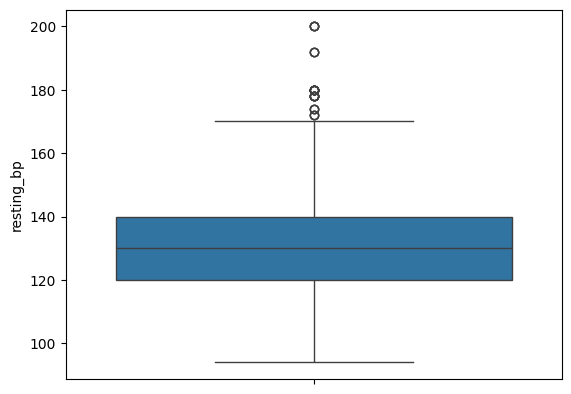

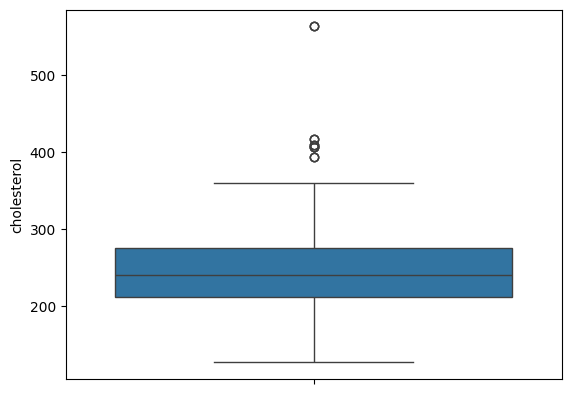

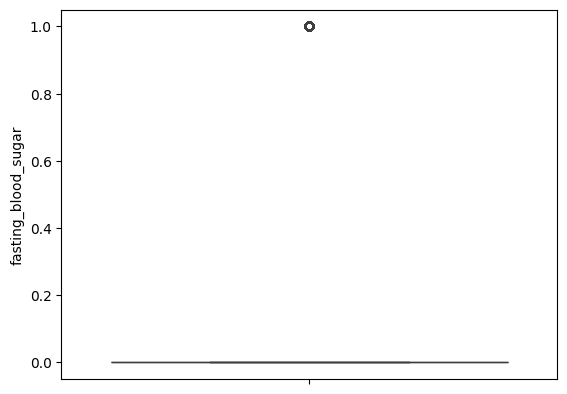

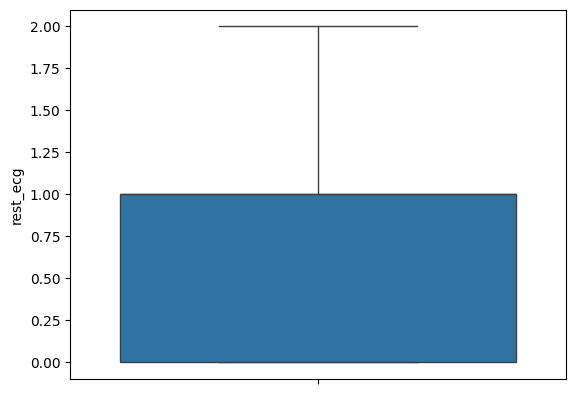

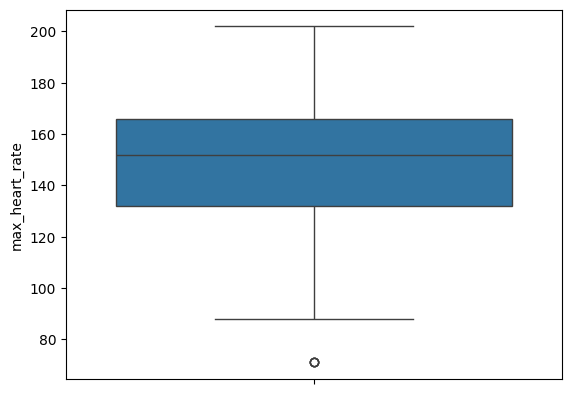

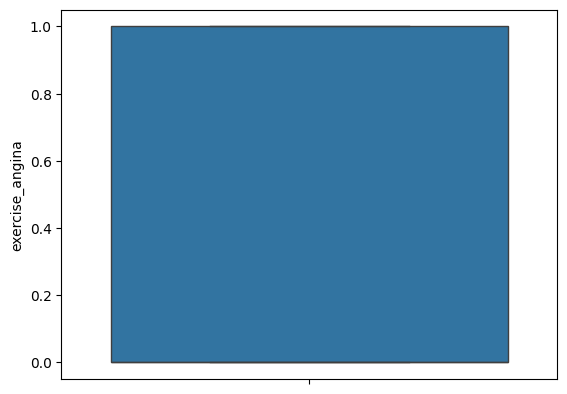

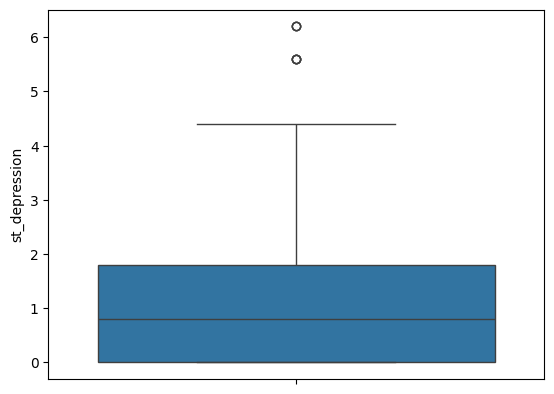

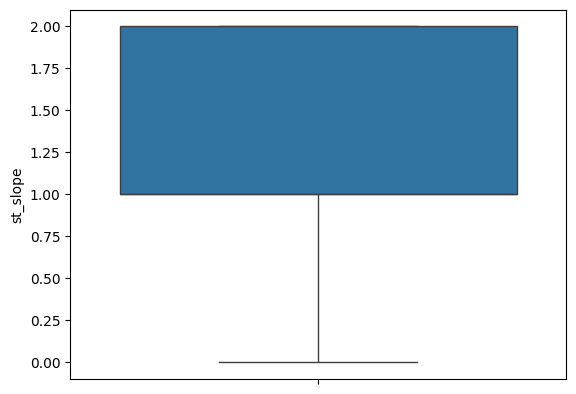

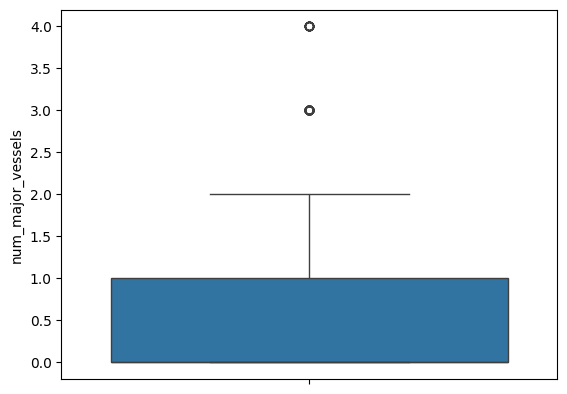

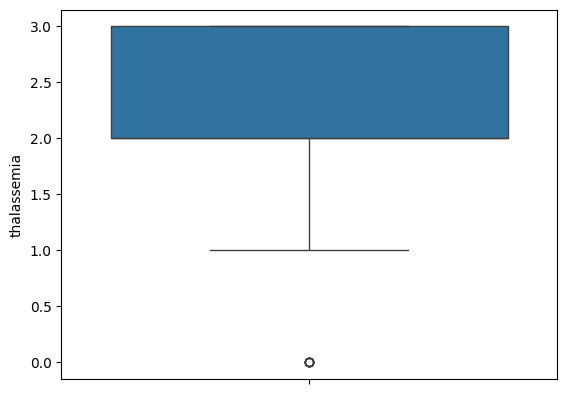

In [138]:
import seaborn as sns
for i,predictor in enumerate(df.drop(columns=['age','gender','heart_disease'])):
    plt.figure()
    sns.boxplot(df[predictor])

In [139]:
df

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [140]:
# Data Exploration

In [141]:
df.describe()

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [142]:
# Bining

In [143]:
labels=["20-30","30-50","50-60","60-70","Above 70"]
bins=[20,30,50,60,70,100]
df['age']=pd.cut(df.age,bins=bins,labels=labels,right=True)

In [146]:
df=df.rename(columns={"age":"age_group"})

In [147]:
df

,age_group,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,50-60,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,50-60,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,60-70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,60-70,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,60-70,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,50-60,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,50-60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,30-50,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,30-50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<Axes: xlabel='age_group', ylabel='count'>

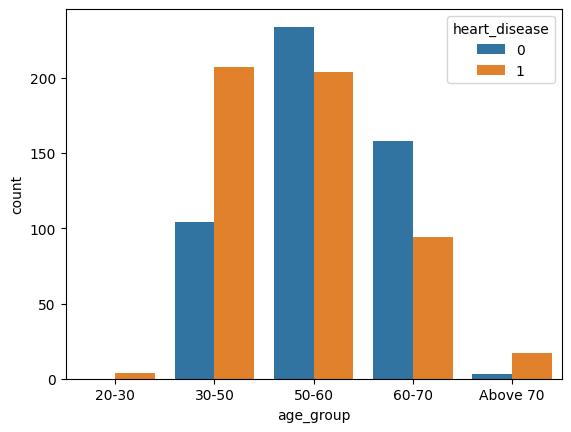

In [150]:
sns.countplot(data=df,x=df.age_group,hue='heart_disease')

1. Maximum Heart Attack Recorded in age groups of (30,50) and (50,60)
2. Minimum Heart Attack Recorded in age groups of Above 70

In [153]:
df_heart_attack=df[df['heart_disease']==1]

In [154]:
df_heart_attack

,age_group,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
5,50-60,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,Above 70,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,30-50,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,30-50,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,50-60,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,30-50,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,30-50,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,30-50,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,50-60,1,1,140,221,0,1,164,1,0.0,2,0,2,1


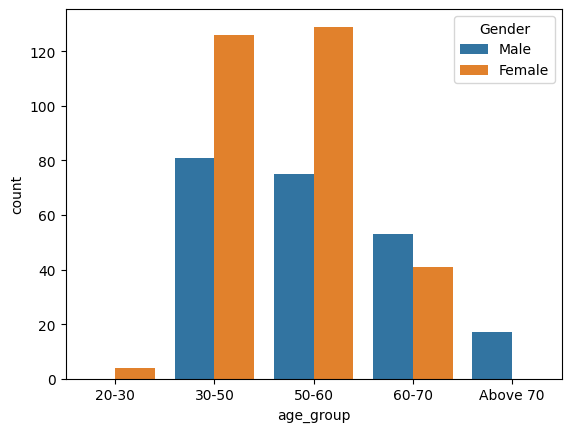

In [160]:
sns.countplot(data=df_heart_attack,x=df_heart_attack.age_group,hue='gender')
plt.legend(title='Gender', labels=['Male', 'Female'])

1. Female Are The maximum one which have highest number of heart attacks ( 30-60 )
2. Male Were Recorded highest for Age group (60-70)

In [164]:
df_heart_attack['chest_pain_type'].value_counts()

chest_pain_type
2    219
1    134
0    122
3     51
Name: count, dtype: int64

The Person Who had Heart Attack have experienced type 2 chest pain more and type 3 as less

In [182]:
df_corr=df_heart_attack.drop(columns=['age_group','gender','heart_disease','chest_pain_type','exercise_angina','rest_ecg','st_depression','st_slope','num_major_vessels','thalassemia'])

In [183]:
df_corr.corr()

,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate
resting_bp,1.000000,0.089431,0.129127,0.030844
cholesterol,0.089431,1.000000,-0.008669,0.006791
fasting_blood_sugar,0.129127,-0.008669,1.000000,-0.035745
max_heart_rate,0.030844,0.006791,-0.035745,1.000000


In [184]:
df_corr.shape

(526, 4)

<Axes: >

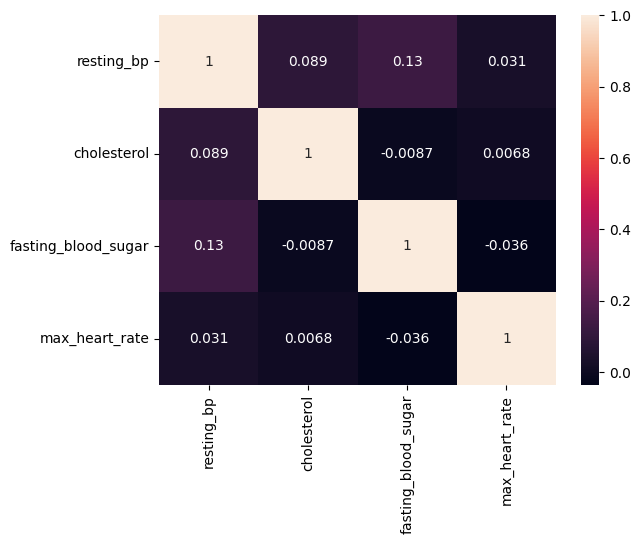

In [187]:
 # This gives a square DataFrame
sns.heatmap(data=df_corr.corr(), annot=True)

1. Strong +ve correlation is found for high Bp and high sugar
2. Strong -ve correlation is found for Chorestrol and Sugar